In [16]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import os,glob
import warnings
warnings.simplefilter('ignore')

In [17]:
training_path='/content/drive/MyDrive/new_cotton/train'

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
disease_class=['diseased cotton leaf','diseased cotton plant','fresh cotton leaf','fresh cotton plant']

In [20]:
##taking one diseased cotton leaf image
path=os.path.join(training_path ,disease_class[0],'*')
img=glob.glob(path)
img=cv2.imread(img[0])

Text(0.5, 1.0, 'diseased cotton leaf')

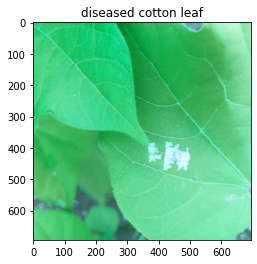

In [16]:
plt.imshow(img)
plt.title('diseased cotton leaf')

In [17]:
##diseased cotton plant
path=os.path.join(training_path ,disease_class[1],'*')
img=glob.glob(path)
img=cv2.imread(img[0])

Text(0.5, 1.0, 'diseased cotton plant')

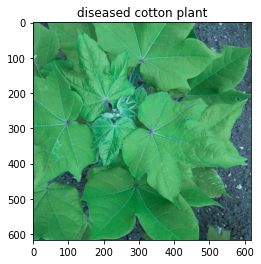

In [18]:
plt.imshow(img)
plt.title('diseased cotton plant')

In [19]:
#fresh cotton plant
path=os.path.join(training_path ,disease_class[3],'*')
img=glob.glob(path)
img=cv2.imread(img[0])

Text(0.5, 1.0, 'fresh cotton plant')

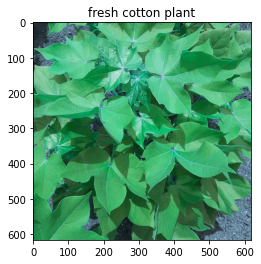

In [20]:
plt.imshow(img)
plt.title('fresh cotton plant')

In [21]:
from keras.preprocessing.image import ImageDataGenerator

In [22]:
##with augumentation
train_datagen=ImageDataGenerator(rescale=1./255,rotation_range=20,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')

In [23]:
val_datagen=ImageDataGenerator(rescale=1.0/255)

In [24]:
folders=glob.glob('/content/drive/MyDrive/new_cotton/train/*')
#len(folders)
print(f'number of output classes in training data:{len(folders)}')

number of output classes in training data:4


In [25]:
train_data=train_datagen.flow_from_directory('/content/drive/MyDrive/new_cotton/train',target_size=(180,180),batch_size=32,class_mode='categorical')

Found 1951 images belonging to 4 classes.


In [26]:
train_data.class_indices

{'diseased cotton leaf': 0,
 'diseased cotton plant': 1,
 'fresh cotton leaf': 2,
 'fresh cotton plant': 3}

In [27]:
val_data=val_datagen.flow_from_directory('/content/drive/MyDrive/new_cotton/val',target_size=(180,180),batch_size=32,class_mode='categorical')

Found 253 images belonging to 4 classes.


In [28]:
val_data.class_indices

{'diseased cotton leaf': 0,
 'diseased cotton plant': 1,
 'fresh cotton leaf': 2,
 'fresh cotton plant': 3}

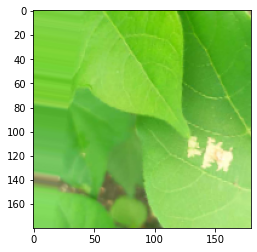

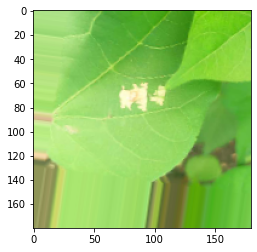

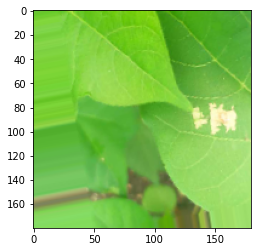

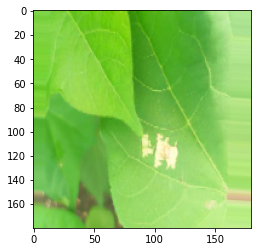

In [26]:
##displaying randomly augumented training images
from keras.preprocessing import image
fnames=[os.path.join('/content/drive/MyDrive/new_cotton/train/diseased cotton leaf',fname) for fname in os.listdir('/content/drive/MyDrive/new_cotton/train/diseased cotton leaf')]
img_path=fnames[0]
img=image.load_img(img_path,target_size=(180,180))
x=image.img_to_array(img)
x=x.reshape((1,)+x.shape)
i=0
for batch in train_datagen.flow(x,batch_size=1):
    plt.figure(i)
    imgplot=plt.imshow(image.array_to_img(batch[0]))
    i+=1
    if i%4==0:
        break
        plt.show()


In [38]:
from keras import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [33]:
##model
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(180,180,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(4,activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 178, 178, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 87, 87, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 43, 43, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 41, 41, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 20, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 256)       2

In [34]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [35]:
history=model.fit_generator(train_data,validation_data=val_data,steps_per_epoch=len(train_data),validation_steps=len(val_data),epochs=30)

Epoch 1/30
61/61 [==============================] - 643s 10s/step - loss: 1.3502 - accuracy: 0.4253 - val_loss: 1.0214 - val_accuracy: 0.4822
Epoch 2/30
61/61 [==============================] - 26s 422ms/step - loss: 0.9811 - accuracy: 0.5809 - val_loss: 0.7409 - val_accuracy: 0.7115
Epoch 3/30
61/61 [==============================] - 26s 422ms/step - loss: 0.8860 - accuracy: 0.6211 - val_loss: 0.6044 - val_accuracy: 0.7549
Epoch 4/30
61/61 [==============================] - 26s 421ms/step - loss: 0.6785 - accuracy: 0.7203 - val_loss: 0.4661 - val_accuracy: 0.7747
Epoch 5/30
61/61 [==============================] - 26s 420ms/step - loss: 0.6133 - accuracy: 0.7440 - val_loss: 0.4767 - val_accuracy: 0.8498
Epoch 6/30
61/61 [==============================] - 26s 419ms/step - loss: 0.5655 - accuracy: 0.7707 - val_loss: 0.4175 - val_accuracy: 0.8379
Epoch 7/30
61/61 [==============================] - 26s 419ms/step - loss: 0.5220 - accuracy: 0.7955 - val_loss: 0.2872 - val_accuracy: 0.8933


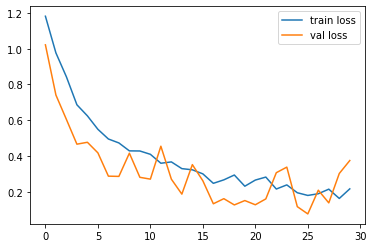

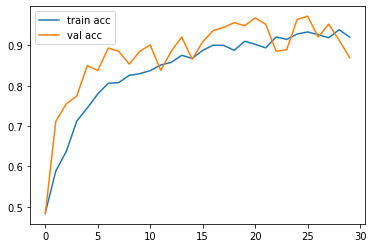

<Figure size 432x288 with 0 Axes>

In [40]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [39]:
##model
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(180,180,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(512,(3,3),activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(4,activation='softmax'))
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 178, 178, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 87, 87, 64)        18496     
_________________________________________________________________
dropout (Dropout)            (None, 87, 87, 64)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 43, 43, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 41, 41, 128)       73856     
_________________________________________________________________
dropout_1 (Dropout)          (None, 41, 41, 128)      

In [42]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [43]:
history_new=model.fit_generator(train_data,validation_data=val_data,steps_per_epoch=len(train_data),validation_steps=len(val_data),epochs=35)

Epoch 1/35
61/61 [==============================] - 28s 438ms/step - loss: 1.3985 - accuracy: 0.3989 - val_loss: 1.2268 - val_accuracy: 0.3083
Epoch 2/35
61/61 [==============================] - 26s 430ms/step - loss: 1.1189 - accuracy: 0.5066 - val_loss: 1.1353 - val_accuracy: 0.4941
Epoch 3/35
61/61 [==============================] - 26s 431ms/step - loss: 1.0166 - accuracy: 0.5532 - val_loss: 0.9826 - val_accuracy: 0.4625
Epoch 4/35
61/61 [==============================] - 26s 431ms/step - loss: 0.8568 - accuracy: 0.6107 - val_loss: 0.9606 - val_accuracy: 0.7154
Epoch 5/35
61/61 [==============================] - 29s 472ms/step - loss: 0.8628 - accuracy: 0.6369 - val_loss: 0.8618 - val_accuracy: 0.6245
Epoch 6/35
61/61 [==============================] - 31s 509ms/step - loss: 0.6202 - accuracy: 0.7348 - val_loss: 0.5578 - val_accuracy: 0.8340
Epoch 7/35
61/61 [==============================] - 31s 509ms/step - loss: 0.5228 - accuracy: 0.7941 - val_loss: 0.5576 - val_accuracy: 0.7352

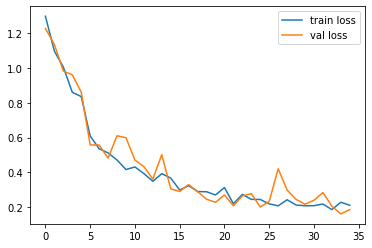

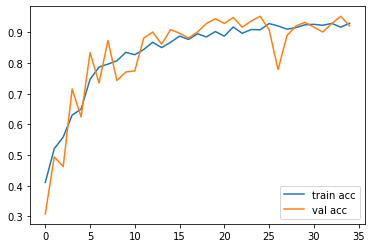

<Figure size 432x288 with 0 Axes>

In [47]:
plt.plot(history_new.history['loss'], label='train loss')
plt.plot(history_new.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history_new.history['accuracy'], label='train acc')
plt.plot(history_new.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [48]:
model.save('cotton_disease_prediction.h5')